In [1]:
from datetime import datetime, timedelta

import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

sys.path.append('..')
from util.stock_loader import Loader

In [2]:
DATA = '../models/qp/data'
SYMBOLS = [
    'AAPL', 'ABMD', 'ABNB', 'ACN', 'ADBE', 'ADYEY', 'AMD', 'AMGN',
    'AMZN', 'ANET', 'ASML', 'AXON', 'BROS', 'BYND', 'CHWY', 'CRWD',
    'DDOG', 'DGX', 'DIS', 'DOCS', 'DOCU', 'DUOL', 'EDIT', 'ETSY',
    'FLGT', 'FTNT', 'GH', 'GMED', 'GOOG', 'IDXX', 'INTG', 'ISRG',
    'JD', 'LRCX', 'LSPD', 'LULU', 'MA', 'MASI', 'MDB', 'MELI', 'MNST',
    'MSFT', 'MTCH', 'NET', 'NOW', 'NVCR', 'NVDA', 'ODFL', 'OKTA',
    'OPEN', 'PAC', 'PANW', 'PAYC', 'PINS', 'PTON', 'PYPL', 'QDEL',
    'RBLX', 'RDFN', 'RGEN', 'RIVN', 'RMD', 'ROKU', 'RVLV', 'SAM',
    'SBUX', 'SE', 'SHOP', 'SNOW', 'TASK', 'TDOC', 'TEAM', 'TMUS', 
    'TREX', 'TSCO', 'TSLA', 'TTC', 'TTD', 'TTWO', 'TWLO', 'TWTR',
    'TYL', 'UPST', 'VEEV', 'VLD', 'VRTX', 'XPEV', 'ZBRA', 'ZM']
LINGERERS = [
    'AGI', 'AMEH', 'AMRK', 'APPS', 'APT', 'BRTX', 'BTTR', 'BYRN', 'CEF',
    'CENN', 'CGAU', 'CHEF', 'CTGO', 'CVE', 'DQ', 'DTST', 'DYAI', 'EA', 'EP',
    'ESOA', 'FCUV', 'FKWL', 'FNV', 'GCBC', 'GME', 'HBM', 'HMY',
    'HNRG', 'IDR', 'INTZ', 'LPLA', 'MCVT', 'MICS', 'MNMD', 'MOBQ', 'MTA',
    'OMQS', 'PACB', 'PETV', 'POWW', 'PRPH', 'RVP', 'RVYL', 'SAND',
    'SOBR', 'TGLS', 'VIRT', 'VIVO', 'WAVD', 'WKHS', 'WRN', 'YORW',
    'ZEST', 'ZYXI']
BEST_WEIGHTED = [
    'AMED', 'COOP', 'CPRI', 'CROX', 'CTSH', 'EPSN', 'FSI', 'FSLR',
    'GGB', 'GTLS', 'HLIT', 'LFMD', 'MMYT', 'MPX', 'SIX', 'TGLS',
    'TRGP', 'UI', 'VOC', 'WD']
INDICES = ['^GSPC', # S&P 500
           '^IXIC', # Nasdaq
           '^NYA']  # NY Stock Exchange (total)

In [3]:
N_YEARS = 10 # 5
N_DAYS = int(round(365.25 * N_YEARS))
END = (datetime.now() + timedelta(1)).date()
START = str(END - timedelta(N_DAYS))
START, END

('2013-01-28', datetime.date(2023, 1, 28))

In [4]:
batch = (
    sorted(list(set(SYMBOLS + LINGERERS + BEST_WEIGHTED))) + INDICES) # run all
stock_loader = Loader(batch, START, str(END), verbose=True)
data = stock_loader.download().rename(columns={'Adj Close': 'AdjClose'})

[*********************100%***********************]  165 of 165 completed
Generating derived columns...
AAPL... ABMD... ABNB... ACN... ADBE... ADYEY... AGI... AMD... AMED... AMEH... AMGN... AMRK... AMZN... ANET... APPS... APT... ASML... AXON... BROS... BRTX... BTTR... BYND... BYRN... CEF... CENN... CGAU... CHEF... CHWY... COOP... CPRI... CROX... CRWD... CTGO... CTSH... CVE... DDOG... DGX... DIS... DOCS... DOCU... DQ... DTST... DUOL... DYAI... EA... EDIT... EP... EPSN... ESOA... ETSY... FCUV... FKWL... FLGT... FNV... FSI... FSLR... FTNT... GCBC... GGB... GH... GME... GMED... GOOG... GTLS... HBM... HLIT... HMY... HNRG... IDR... IDXX... INTG... INTZ... ISRG... JD... LFMD... LPLA... LRCX... LSPD... LULU... MA... MASI... MCVT... MDB... MELI... MICS... MMYT... MNMD... MNST... MOBQ... MPX... MSFT... MTA... MTCH... NET... NOW... NVCR... NVDA... ODFL... OKTA... OMQS... OPEN... PAC... PACB... PANW... PAYC... PETV... PINS... POWW... PRPH... PTON... PYPL... QDEL... RBLX... RDFN... RGEN... RIVN... R

In [5]:
data['Date'].tail()

2514   2023-01-23
2515   2023-01-24
2516   2023-01-25
2517   2023-01-26
2518   2023-01-27
Name: Date, dtype: datetime64[ns]

In [6]:
spx = data['DayToDayChange']['^GSPC']
spx = spx[1:]
#spx = spx / spx[1]
spx

1       1.005106
2       0.996100
3       0.997437
4       1.010053
5       0.988461
          ...   
2514    1.011881
2515    0.999288
2516    0.999818
2517    1.011008
2518    1.002495
Name: ^GSPC, Length: 2518, dtype: float64

In [7]:
data['DayToDayChange'].quantile(q=[0.75], axis=1).T[1:]

,0.75
1,1.006972
2,1.003083
3,1.008117
4,1.015967
5,1.000000
...,...
2514,1.035277
2515,1.005603
2516,1.008378
2517,1.024827


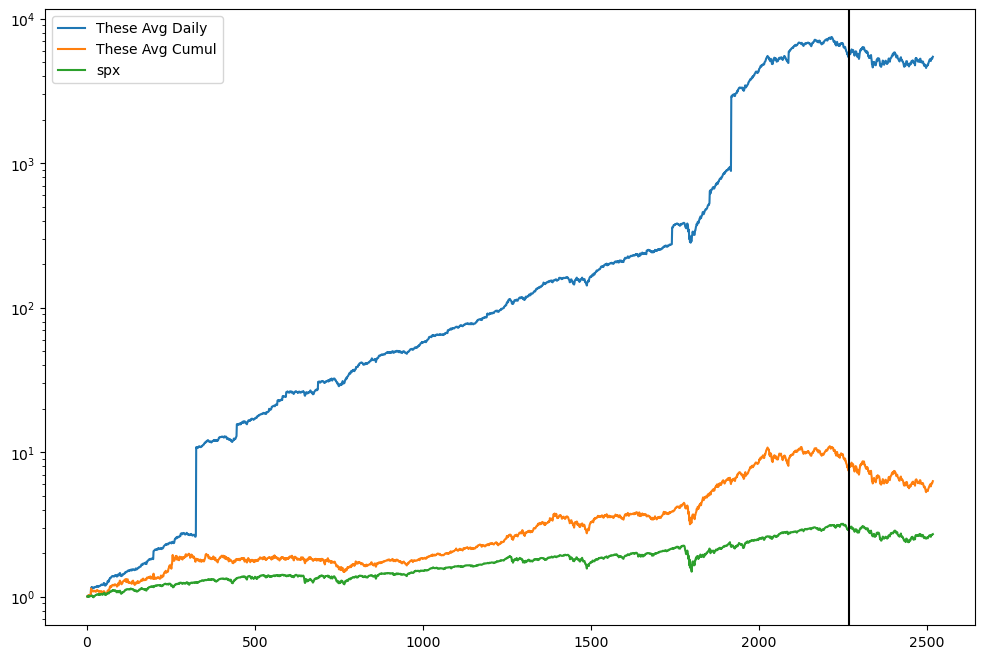

In [8]:
plt.figure(figsize=[12, 8])
plt.plot(
    data['DayToDayChange'].mean(axis=1)[1:].cumprod(), 
    label='These Avg Daily')
plt.plot(
    data['DayToDayChange'].cumprod().mean(axis=1),
    label='These Avg Cumul')
plt.plot(spx.cumprod(), label='spx')
plt.yscale('log')
plt.legend();

n = len(spx)
one_year = n - 250
plt.axvline(x=one_year, color='k');

In [9]:
out = pd.DataFrame(data.Date)
out['mine1'] = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
out['mine2'] = data['DayToDayChange'].cumprod().mean(axis=1)
out.head()

,Date,mine1,mine2
0,2013-01-28,NaN,NaN
1,2013-01-29,1.002985,1.002985
2,2013-01-30,1.001813,1.003460
3,2013-01-31,1.001870,1.002289
4,2013-02-01,1.021730,1.022879


In [10]:
out.tail()

,Date,mine1,mine2
2514,2023-01-23,5326.283541,6.091696
2515,2023-01-24,5293.823968,6.078249
2516,2023-01-25,5288.177700,6.091191
2517,2023-01-26,5360.755579,6.209179
2518,2023-01-27,5457.402430,6.307921


In [12]:
out.iloc[1:, :].to_csv('../data/mine.csv', index=False)

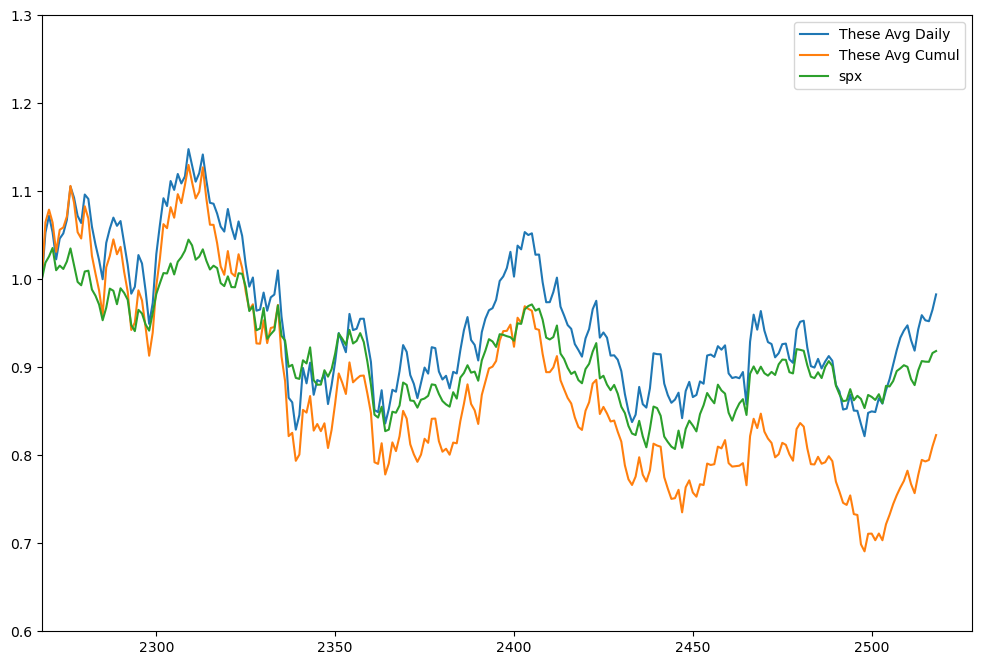

In [13]:
plt.figure(figsize=[12, 8])
a = data['DayToDayChange'].mean(axis=1)[1:].cumprod()
n = len(a)
start = n - 250
a = a / a[start]
b = data['DayToDayChange'].cumprod().mean(axis=1)
b = b / b[start]
s = spx.cumprod()
s = s / s[start]
plt.plot(a, label='These Avg Daily')
plt.plot(b, label='These Avg Cumul')
plt.plot(s, label='spx')
#plt.yscale('log')
plt.xlim([one_year, n + 10])
plt.ylim(0.6, 1.3)
plt.legend();

In [14]:
def get_stock_data(stock, data, n_days=60):
    sub = data.loc[
        :,  
        [x for x in list(data) if x[1] == stock]]
    first_value = (sub.Value[stock][sub.Value[stock].notna()].index[0])
    sub = sub.loc[first_value:, :]
    sub.columns = sub.columns.to_series().apply(lambda x: x[0])
    sub.fillna(method='ffill', inplace=True)
    if len(sub) > n_days:
        sub = sub.iloc[-n_days:, :]
    return sub

In [15]:
def get_hilo_mult(stock, ci=0.95):
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    sell_pt = stock.HighMult.quantile(q=[1 - ci]).tolist()[0]
    buy_pt = stock.LowMult.quantile(q=[ci]).tolist()[0]
    return buy_pt, sell_pt

In [16]:
#rblx = get_stock_data('SE', data)
#rblx.head()

In [17]:
#rblx = rblx[['Value', 'Close', 'High', 'Low']]
#rblx.head()

In [18]:
#rblx['NextHigh'] = rblx.High.shift(-1)
#rblx['NextLow'] = rblx.Low.shift(-1)
#rblx['HighMult'] = rblx.NextHigh / rblx.Close
#rblx['LowMult'] = rblx.NextLow / rblx.Close
#rblx.head()

In [19]:
# For selling:
#high_05 = rblx.HighMult.quantile(q=[0.05])
#print(high_05)
#plt.hist(rblx.HighMult)
#plt.axvline(x=high_05[0.05], color='red');

In [20]:
# For buying:
#low_95 = rblx.LowMult.quantile(q=[0.95])
#print(low_95.tolist()[0])
#plt.hist(rblx.LowMult)
#plt.axvline(x=low_95[0.95], color='red');

In [21]:
#get_hilo_mult(rblx), get_hilo_mult(rblx, ci=0.5)

In [22]:
#aapl = get_stock_data('AAPL', data)
#get_hilo_mult(aapl), get_hilo_mult(aapl, ci=0.5)

In [23]:
def get_macd(stock_data, fast=60, slow=90, signal=80):
    df = stock_data.copy()
    exp1 = df.Value.ewm(span=fast, adjust=False).mean()
    exp2 = df.Value.ewm(span=slow, adjust=False).mean()
    macd = exp1 - exp2
    exp3 = macd.ewm(span=signal, adjust=False).mean()
    histo = macd - exp3
    hdiff = histo.diff(1)
    is_rising = 1 * (hdiff > 0)
    return is_rising

In [24]:
#rblx['Trend'] = get_macd(rblx)
#rblx.head()

In [114]:
np.linspace(0.5, 0.95, 5)

array([0.5   , 0.6125, 0.725 , 0.8375, 0.95  ])

In [115]:
CIS = [0.3, 0.4, 0.5, 0.61, 0.73, 0.84, 0.95]

In [116]:
def get_hilo_mults(stock, cis=CIS):
    stock['Trend'] = get_macd(stock)
    stock['NextHigh'] = stock.High.shift(-1)
    stock['NextLow'] = stock.Low.shift(-1)
    stock['HighMult'] = stock.NextHigh / stock.Close
    stock['LowMult'] = stock.NextLow / stock.Close
    upward = stock[stock.Trend == 1]
    downward = stock[stock.Trend == 0]
    buy_pts_up = upward.LowMult.quantile(q=cis).tolist()
    sell_pts_up = (
        upward.HighMult.quantile(q=[1 - ci for ci in cis]).tolist())
    buy_pts_down = downward.LowMult.quantile(q=cis).tolist()
    sell_pts_down = (
        downward.HighMult.quantile(q=[1 - ci for ci in cis]).tolist())
    return buy_pts_up + sell_pts_up + buy_pts_down + sell_pts_down

In [117]:
#get_hilo_mults(aapl)

In [127]:
columns = [
    f'{bs}_pt_{ud}_p{int(100*p)}' 
    for ud in ['up', 'down']
    for bs in ['buy', 'sell'] 
    for p in CIS]
#columns

In [128]:
out = []
for symbol in batch:
    stock = get_stock_data(symbol, data)
    mults = get_hilo_mults(stock)
    out.append([symbol, *mults])
df = pd.DataFrame(
    out, 
    columns=['stock'] + columns)
df.head()

,stock,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,...,buy_pt_down_p73,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95
0,AAPL,0.982218,0.984720,0.986883,0.991981,0.993876,0.994925,1.000263,1.018218,1.015581,...,0.997074,1.000122,1.007905,1.021027,1.017425,1.009309,1.007486,1.004475,1.001243,0.991824
1,ABMD,0.999031,0.999569,1.000000,1.000000,1.000000,1.000000,1.000580,1.001317,1.000755,...,1.000000,1.000000,1.000168,1.003438,1.003127,1.001458,1.000157,1.000000,1.000000,1.000000
2,ABNB,0.975111,0.977270,0.986695,0.989507,0.993849,1.002116,1.011049,1.030941,1.023038,...,0.994227,0.999935,1.004390,1.026822,1.019382,1.013329,1.009382,1.004161,0.998518,0.986366
3,ACN,0.977737,0.982385,0.985721,0.991055,0.996726,0.999473,1.002947,1.013095,1.009445,...,0.998945,1.000799,1.009515,1.027344,1.022266,1.016603,1.011113,1.004692,0.996704,0.986470
4,ADBE,0.974174,0.980531,0.982635,0.984814,0.990568,0.996616,1.002754,1.018958,1.011625,...,1.001887,1.006265,1.025504,1.034417,1.028527,1.024464,1.018116,1.012240,1.007777,0.997540


In [129]:
last = data.index.max()
price = pd.DataFrame(data.loc[last, 'Value'])
price.columns = ['price']
price['stock'] = price.index
price

,price,stock
AAPL,145.929993,AAPL
ABMD,NaN,ABMD
ABNB,115.940002,ABNB
ACN,277.269989,ACN
ADBE,370.709991,ADBE
...,...,...
ZM,74.150002,ZM
ZYXI,15.35,ZYXI
^GSPC,4070.560059,^GSPC
^IXIC,11621.709961,^IXIC


In [130]:
prices = df.merge(price, how='left', on='stock')
prices.head()

,stock,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,...,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95,price
0,AAPL,0.982218,0.984720,0.986883,0.991981,0.993876,0.994925,1.000263,1.018218,1.015581,...,1.000122,1.007905,1.021027,1.017425,1.009309,1.007486,1.004475,1.001243,0.991824,145.929993
1,ABMD,0.999031,0.999569,1.000000,1.000000,1.000000,1.000000,1.000580,1.001317,1.000755,...,1.000000,1.000168,1.003438,1.003127,1.001458,1.000157,1.000000,1.000000,1.000000,NaN
2,ABNB,0.975111,0.977270,0.986695,0.989507,0.993849,1.002116,1.011049,1.030941,1.023038,...,0.999935,1.004390,1.026822,1.019382,1.013329,1.009382,1.004161,0.998518,0.986366,115.940002
3,ACN,0.977737,0.982385,0.985721,0.991055,0.996726,0.999473,1.002947,1.013095,1.009445,...,1.000799,1.009515,1.027344,1.022266,1.016603,1.011113,1.004692,0.996704,0.986470,277.269989
4,ADBE,0.974174,0.980531,0.982635,0.984814,0.990568,0.996616,1.002754,1.018958,1.011625,...,1.006265,1.025504,1.034417,1.028527,1.024464,1.018116,1.012240,1.007777,0.997540,370.709991


In [131]:
def round_if_float(x):
    if np.isnan(x):
        return -1
    return round(x, 2)

In [132]:
for col in list(prices):
    if col.startswith('buy') or col.startswith('sell'):
        prices[col] *= prices.price
    if col != 'stock':
        prices[col] = prices[col].apply(round_if_float)
prices.set_index('stock', inplace=True)
prices.drop(INDICES, inplace=True)
prices.tail()

,buy_pt_up_p30,buy_pt_up_p40,buy_pt_up_p50,buy_pt_up_p61,buy_pt_up_p73,buy_pt_up_p84,buy_pt_up_p95,sell_pt_up_p30,sell_pt_up_p40,sell_pt_up_p50,...,buy_pt_down_p84,buy_pt_down_p95,sell_pt_down_p30,sell_pt_down_p40,sell_pt_down_p50,sell_pt_down_p61,sell_pt_down_p73,sell_pt_down_p84,sell_pt_down_p95,price
stock,,,,,,,,,,,,,,,,,,,,,
YORW,44.16,44.27,44.46,44.48,44.59,44.76,44.96,45.44,45.28,45.18,...,44.69,45.10,45.42,45.39,45.23,45.17,45.05,44.87,44.79,44.82
ZBRA,308.39,309.98,311.15,313.39,315.20,317.32,319.79,324.55,323.30,321.80,...,316.35,319.81,325.55,324.72,323.96,322.15,320.03,318.01,313.74,317.10
ZEST,0.31,0.31,0.32,0.32,0.32,0.33,0.35,0.38,0.38,0.37,...,0.34,0.34,0.38,0.37,0.37,0.36,0.35,0.34,0.34,0.34
ZM,71.81,72.09,72.31,72.80,73.11,73.56,75.10,76.50,75.52,75.06,...,73.47,74.62,75.84,75.55,75.23,74.97,74.50,73.97,73.08,74.15
ZYXI,14.91,14.93,15.05,15.14,15.19,15.28,15.38,15.78,15.68,15.65,...,15.34,15.39,15.99,15.90,15.85,15.75,15.67,15.53,15.50,15.35


In [133]:
prices.to_csv('mults.csv')
!open ./mults.csv